In [1]:
import os
import numpy as np 
import pandas as pd 

for dirname, _, filenames in os.walk('kaggle kernels output rutwikvj/using-summarizer-on-yt-videos-and-news-articles -p /path/to/dest'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
pip install transformers

     |████████████████████████████████| 4.0 MB 7.1 MB/s 
     |████████████████████████████████| 596 kB 57.8 MB/s 
     |████████████████████████████████| 77 kB 7.4 MB/s 
     |████████████████████████████████| 6.6 MB 39.2 MB/s 
     |████████████████████████████████| 880 kB 44.6 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=22dc5ef5c774beabcb900872566f8c99cc64241ee636dcde81038a0820af5fb9
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!pip install youtube_transcript_api


In [4]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [5]:
youtube_video = "https://www.youtube.com/watch?v=0bi1PvXCbr8"


In [6]:
video_id = youtube_video.split("=")[1]


In [7]:
video_id

'0bi1PvXCbr8'

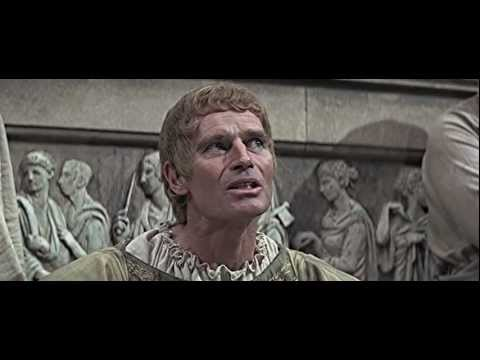

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [9]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [10]:
transcript[0:10]

[{'duration': 4.56,
  'start': 0.5,
  'text': "He says, for Brutus' sake,\nHe finds himself beholding to us all."},
 {'duration': 3.77,
  'start': 5.06,
  'text': "Fourth Citizen\n'Twere best he speak no harm of Brutus here."},
 {'duration': 1.599,
  'start': 8.83,
  'text': 'First Citizen\nThis Caesar was a tyrant.'},
 {'duration': 1.151,
  'start': 10.429,
  'text': "Third Citizen\nNay, that's certain:"},
 {'duration': 2.059,
  'start': 11.58,
  'text': 'We are blest that Rome is rid of him.'},
 {'duration': 1.0, 'start': 13.639, 'text': 'Second Citizen\nPeace!'},
 {'duration': 2.06,
  'start': 14.639,
  'text': 'let us hear what Antony can say.'},
 {'duration': 1.871, 'start': 16.699, 'text': 'ANTONY\nYou gentle Romans,--'},
 {'duration': 3.27,
  'start': 18.57,
  'text': 'Citizens\nPeace, ho! let us hear him.'},
 {'duration': 2.65,
  'start': 21.84,
  'text': 'ANTONY\nFriends, Romans, countrymen, lend me your'}]

In [11]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

8320


In [12]:
summarizer = pipeline('summarization')


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [13]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

input text 
 He says, for Brutus' sake,
He finds himself beholding to us all. Fourth Citizen
'Twere best he speak no harm of Brutus here. First Citizen
This Caesar was a tyrant. Third Citizen
Nay, that's certain: We are blest that Rome is rid of him. Second Citizen
Peace! let us hear what Antony can say. ANTONY
You gentle Romans,-- Citizens
Peace, ho! let us hear him. ANTONY
Friends, Romans, countrymen, lend me your ears;
I come to bury Caesar, not to praise him. The evil that men do lives after them;
The good is oft interred with their bones; So let it be with Caesar. The noble Brutus
Hath told you Caesar was ambitious: If it were so, it was a grievous fault,
And grievously hath Caesar answer'd it. Here, under leave of Brutus and the rest--
For Brutus is an honourable man; So are they all, all honourable men--
Come I to speak in Caesar's funeral. He was my friend, faithful and just to me:
But Brutus says he was ambitious; And Brutus is an honourable man. He hath brought many captives 

Your max_length is set to 142, but you input_length is only 82. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)


Summarized text
 First Citizen: We'll burn the house of Brutus. We'll revenge his death. Second Citizen: Most noble Caesar! We'll revenge his death. Third Citizen: We'll mutiny. First Citizen; we'll burn Brutus' house .
input text 
this side Tiber; he hath left them you, And to your heirs for ever, common pleasures,
To walk abroad, and recreate yourselves. Here was a Caesar! when comes such another? First Citizen
Never, never. Come, away, away! We'll burn his body in the holy place,
And with the brands fire the traitors' houses. Take up the body.
Summarized text
 We'll burn his body in the holy place, and with the brands fire the traitors' houses. Take up the body. this side Tiber; he hath left them you, And to your heirs for ever, common pleasures, to walk abroad, and recreate yourselves.


In [14]:
len(str(summarized_text))


2566

In [15]:
str(summarized_text)


'[" Antony: \'I come to bury Caesar, not to praise him. The evil that men do lives after them; the good is oft interred with their bones; So let it be with Caesar. The noble Brutus tells you Caesar was ambitious: If it were so, it was a grievous fault, and grievously hath Caesar answer\'d it. Here, under leave of Brutus and the rest--", \' First Citizen: "If thou consider rightly of the matter, Caesar has had great wrong" Second Citizen:\\xa0"If thee consider rightly, Caesar\\\'s had great right wrong. I fear there will be a worse come in his plaudits" Third Citizen: \\\'If thee think there is much reason in his sayings. And, sure, he is an honourable man\\\'\', \' First Citizen: If I were disposed to stir your hearts and minds to mutiny and rage, I should do Brutus wrong, and Cassius wrong, I rather choose to wrong the dead, to wrong myself and you, Than I will wrong such honourable men. ace ace .\', " We\'ll hear the will: read it, Mark Antony. All we will hear Caesar\'s will. Antony